In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
#Number of input qubits
n = 3

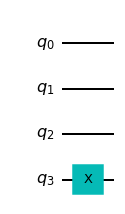

In [3]:
#Constant oracle
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)

if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

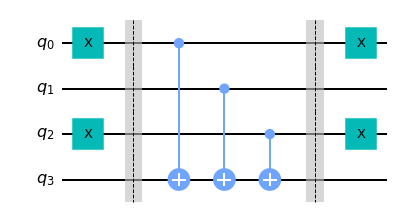

In [4]:
#Balanced oracle
balance_oracle = QuantumCircuit(n+1)

b_str = '101'

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balance_oracle.x(qubit)

balance_oracle.barrier()

for qubit in range(n):
    balance_oracle.cx(qubit, n)

balance_oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balance_oracle.x(qubit)

balance_oracle.draw('mpl')

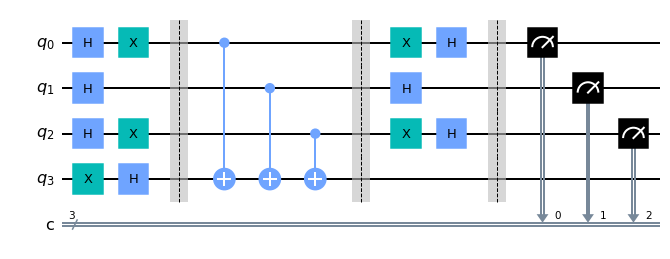

In [5]:
#Deutsch-Jozsa algorithm
dj_algo = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_algo.h(qubit)
    
dj_algo.x(n)
dj_algo.h(n)

dj_algo += balance_oracle

for qubit in range(n):
    dj_algo.h(qubit)

dj_algo.barrier()

for qubit in range(n):
    dj_algo.measure(qubit, qubit)

dj_algo.draw('mpl')

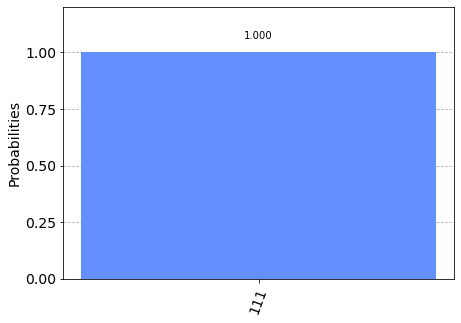

In [6]:
#Measurement
backend = Aer.get_backend('qasm_simulator')
result = execute(dj_algo, backend = backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
#Generalised circuit
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
                
    if case == "constant":
        output = np.random.randint(2)
        
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    
    return oracle_gate

In [8]:
#Deutsch-Jozsa function
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.append(oracle, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
        
    return dj_circuit

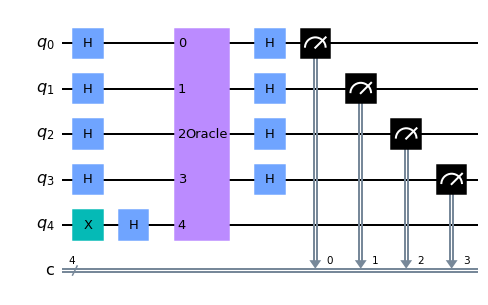

In [9]:
n = 4
oracle_gate = dj_oracle("balanced", n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

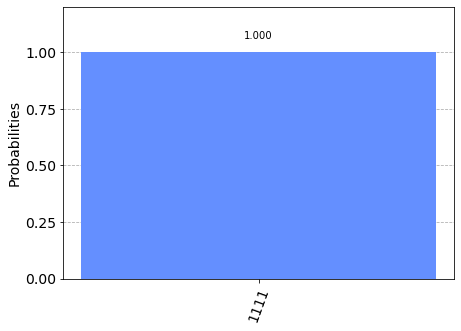

In [10]:
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)